Dataset: https://www.kaggle.com/datasets/striker7/train-and-test-files

In [4]:
!tree -L 4

.
├── Deep_Learning_Experiment_8.ipynb
└── data
    ├── test.csv
    └── train
        ├── images
        │   ├── 0.jpg
        │   ├── 1.jpg
        │   ├── 10.jpg
        │   ├── 100.jpg
        │   ├── 1000.jpg
        │   ├── 1001.jpg
        │   ├── 1002.jpg
        │   ├── 1003.jpg
        │   ├── 1004.jpg
        │   ├── 1005.jpg
        │   ├── 1006.jpg
        │   ├── 1007.jpg
        │   ├── 1008.jpg
        │   ├── 1009.jpg
        │   ├── 101.jpg
        │   ├── 1010.jpg
        │   ├── 1011.jpg
        │   ├── 1012.jpg
        │   ├── 1013.jpg
        │   ├── 1014.jpg
        │   ├── 1015.jpg
        │   ├── 1016.jpg
        │   ├── 1017.jpg
        │   ├── 1018.jpg
        │   ├── 1019.jpg
        │   ├── 102.jpg
        │   ├── 1020.jpg
        │   ├── 1021.jpg
        │   ├── 1022.jpg
        │   ├── 1023.jpg
        │   ├── 1024.jpg
        │   ├── 1025.jpg
        │   ├── 1026.jpg
        │   ├── 1027.jpg
        │   ├── 1028.jpg
        │   ├── 1029.jpg
        │   ├

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
from keras.models import Model
from keras.layers import Flatten, Dense
from keras.applications import VGG16
from keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
traindf = pd.read_csv("./data/train/train.csv", dtype=str)
traindf.head(10)

,image_names,emergency_or_not
0,1503.jpg,0
1,1420.jpg,0
2,1764.jpg,0
3,1356.jpg,0
4,1117.jpg,0
5,45.jpg,1
6,2313.jpg,0
7,1657.jpg,0
8,294.jpg,1
9,999.jpg,0


In [10]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.10)

valid_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.15)

In [11]:
train_generator = train_datagen.flow_from_dataframe(
    dataframe=traindf,
    directory="./data/train/images",
    x_col="image_names",
    y_col="emergency_or_not",
    subset="training",
    batch_size=16,
    seed=42,
    shuffle=True,
    class_mode="binary",
    target_size=(224, 224)
)

Found 1646 validated image filenames belonging to 2 classes.


In [12]:
test_generator = test_datagen.flow_from_dataframe(
    dataframe=traindf,
    directory="./data/train/images",
    x_col="image_names",
    y_col="emergency_or_not",
    subset="validation",
    batch_size=16,
    seed=42,
    shuffle=True,
    class_mode="binary",
    target_size=(224, 224)
)

Found 164 validated image filenames belonging to 2 classes.


In [13]:
valid_generator = valid_datagen.flow_from_dataframe(
    dataframe=traindf,
    directory="./data/train/images",
    x_col="image_names",
    y_col="emergency_or_not",
    subset="validation",
    batch_size=16,
    seed=42,
    shuffle=True,
    class_mode="binary",
    target_size=(224, 224)
)

Found 246 validated image filenames belonging to 2 classes.


In [16]:
# loading weights of VGG19 without the top layer. These weights are traine on Imagenet dataset
vgg = VGG16(include_top=False, weights="imagenet", input_shape=(224, 224, 3))

for layer in vgg.layers:
    layer.trainable = False

x = Flatten()(vgg.output)
x = Dense(1, activation="sigmoid")(x)

model = Model(inputs=vgg.inputs, outputs=x)
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [17]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │        25,089 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,739,777 (56.23 MB)

 Trainable params: 25,089 (98.00 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [18]:
train_generator.class_indices

{'0': 0, '1': 1}

In [20]:
history = model.fit(train_generator, epochs=5, validation_data=valid_generator)

/Users/kinjal/Desktop/DRIVE/STUDY/MTech/Semester 2/GitHub-Labs/Deep-Learning/env/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5


/Users/kinjal/Desktop/DRIVE/STUDY/MTech/Semester 2/GitHub-Labs/Deep-Learning/env/lib/python3.10/site-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_21']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


103/103 ━━━━━━━━━━━━━━━━━━━━ 396s 4s/step - accuracy: 0.7669 - loss: 0.4775 - val_accuracy: 0.8699 - val_loss: 0.3285
Epoch 2/5
103/103 ━━━━━━━━━━━━━━━━━━━━ 392s 4s/step - accuracy: 0.9199 - loss: 0.2103 - val_accuracy: 0.9146 - val_loss: 0.2105
Epoch 3/5
103/103 ━━━━━━━━━━━━━━━━━━━━ 430s 4s/step - accuracy: 0.9299 - loss: 0.1590 - val_accuracy: 0.9390 - val_loss: 0.1450
Epoch 4/5
103/103 ━━━━━━━━━━━━━━━━━━━━ 398s 4s/step - accuracy: 0.9501 - loss: 0.1493 - val_accuracy: 0.9797 - val_loss: 0.0769
Epoch 5/5
103/103 ━━━━━━━━━━━━━━━━━━━━ 400s 4s/step - accuracy: 0.9654 - loss: 0.1069 - val_accuracy: 0.9715 - val_loss: 0.0763


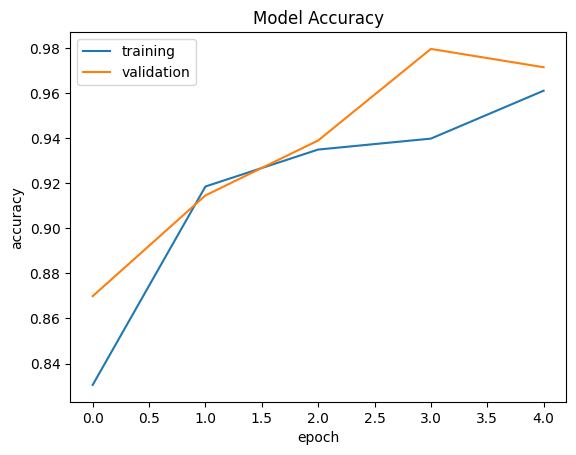

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

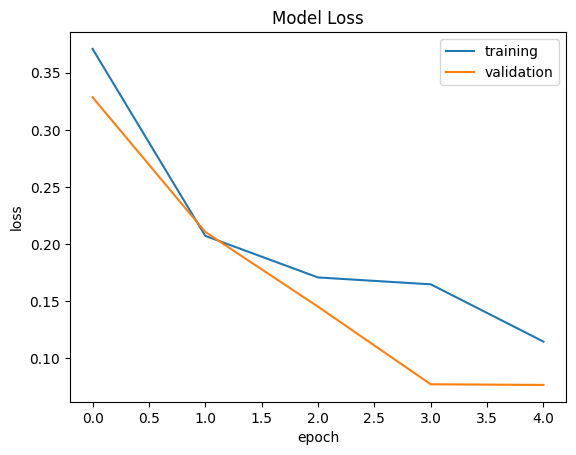

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

In [ ]:
scores = model.evaluate(test_generator, steps=50)

50/50 ━━━━━━━━━━━━━━━━━━━━ 35s 655ms/step - accuracy: 0.9642 - loss: 0.0827


ValueError: incomplete format

In [26]:
print("Accuracy: ", scores[1]*100)

Accuracy:  96.34146094322205
